In [6]:
%matplotlib inline
from medBD import medDB, single_frame
import healpy as hp

In [11]:
umjd = medDB(full_select='select DISTINCT(mjd) from medskybrightness limit 200;', dtypes=float)

In [17]:
f1 = 100
f2 = 199
frame1 = single_frame(umjd[f1])
frame2 = single_frame(umjd[f2])

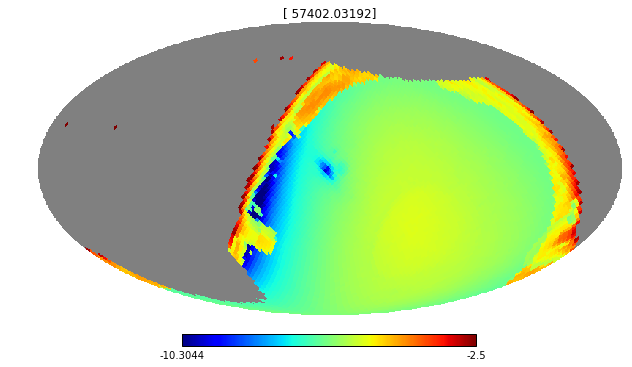

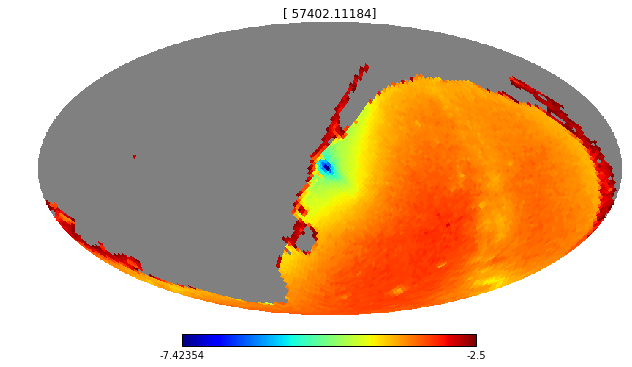

In [18]:
hp.mollview(frame1, title=str(umjd[f1]))
hp.mollview(frame2, title=str(umjd[f2]))

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+14/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


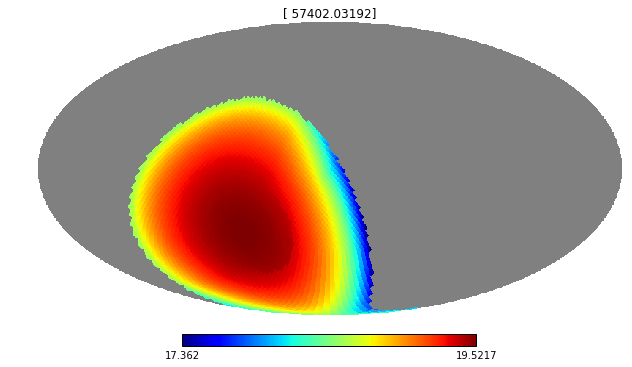

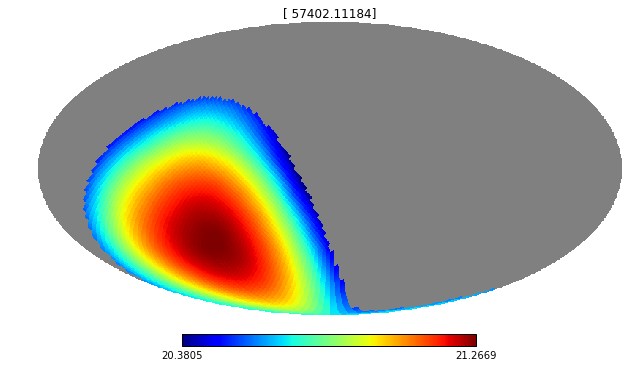

In [20]:
import lsst.sims.skybrightness as sb
import numpy as np
sm = sb.SkyModel(observatory='LSST', mags=True)
nside = 32
lat, ra = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
dec = np.pi/2-lat
sm.setRaDecMjd(ra,dec,umjd[f1], degrees=False)
# mags in numpy array of size [ra.size, 6] where that last dimension in filter in u,g,r,i,z,y order
mags = sm.returnMags()
hp.mollview(mags[:,2], title=str(umjd[f1]))

sm.setRaDecMjd(ra,dec,umjd[f2], degrees=False)
mags = sm.returnMags()
hp.mollview(mags[:,2], title=str(umjd[f2]))